# 多项式拟合

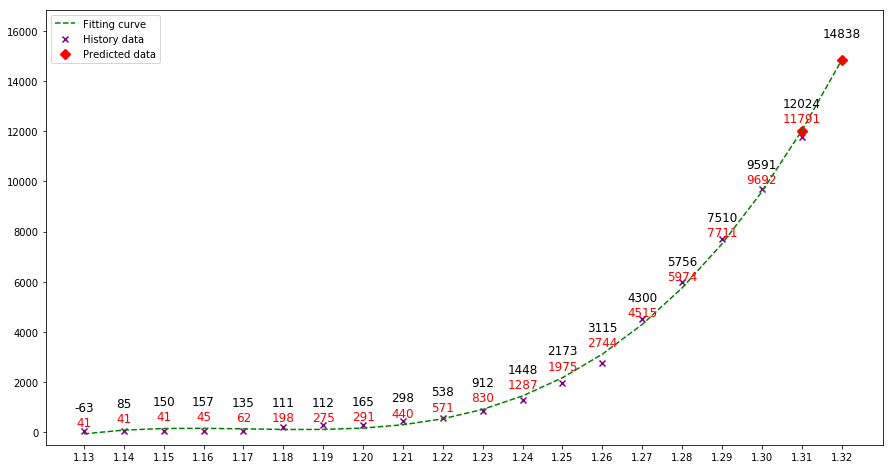

In [9]:
df = sequence_analyse(data)
x, y = df['date'].values[:-1], df['confirm'].values[:-1]
x_idx = list(np.arange(len(x)))
 
def f_1(x, A, B):  
    return A*x + B  
  
def f_2(x, A, B, C):  
    return A*x*x + B*x + C  
  
def f_3(x, A, B, C, D):  
    return A*x*x*x + B*x*x + C*x + D

def f_4(x, A, B, C, D, E):
    return A*x*x*x*x + B*x*x*x + C*x*x + D*x + E

plt.figure(figsize=(15,8))
plt.scatter(x, y, color='purple', marker='x', label="History data")
# plt.plot(x, y, color='gray', label="History curve")
popt, pcov = curve_fit(f_3, x_idx, y)

test_x =  x_idx + [i + 1 for i in x_idx[-1:]]
label_x = np.array(test_x) + 113
test_y = [f_3(i, popt[0],popt[1],popt[2], popt[3]) for i in test_x]
plt.plot(label_x, test_y, 'g--', label="Fitting curve")
plt.scatter(label_x[-2:], test_y[-2:], marker='x', color="red", linewidth=7, label="Predicted data")
plt.xticks(label_x, [date_decode(i) for i in label_x])
plt.ylim([-500, test_y[-1] + 2000])
plt.legend(loc="upper left")

for i in range(len(x)):
    plt.text(x[i], test_y[i] + 200, y[i], ha='center', va='bottom', fontsize=12, color='red')
for a, b in zip(label_x, test_y):
    plt.text(a, b + 800, int(b), ha='center', va='bottom', fontsize=12)

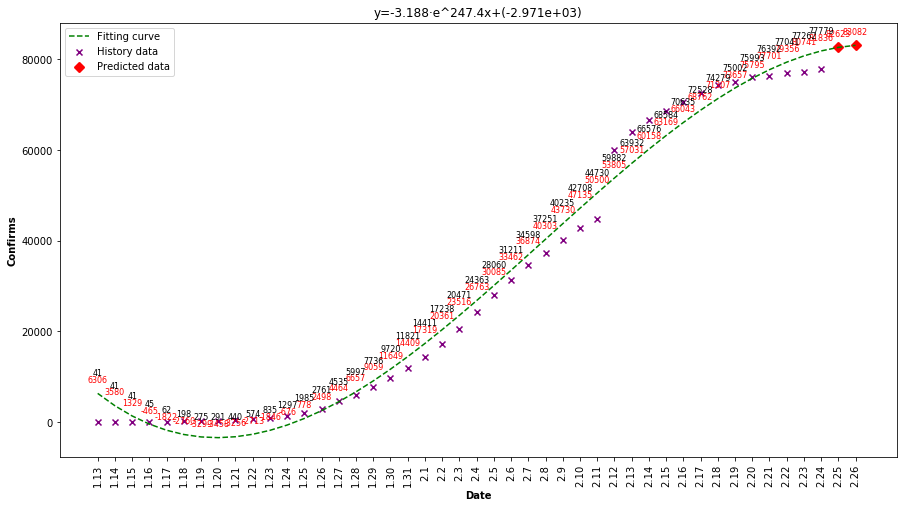

In [35]:
import urllib
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import scipy as sp
from scipy.stats import norm

day_delay = 0

def date_encode(date):
    # '01.24' -> 1 * 100 + 24 = 124
    d = date.split('/')
    month, day = int(d[0]), int(d[1])
    return 100 * month + day

def date_decode(date):
    # 124 -> '01.24'
    return '{}.{}'.format(str(date // 100), str(date % 100))
    
def sequence_analyse(data):
    date_list, confirm_list, dead_list, heal_list, suspect_list = [], [], [], [], []
    data.sort(key = lambda x: date_encode(x['date']))
    for day in data:
        date_list.append(date_encode(day['date']))
        confirm_list.append(int(day['confirm']))
        dead_list.append(int(day['dead']))
        heal_list.append(int(day['heal']))
        suspect_list.append(int(day['suspect']))
    return pd.DataFrame({
        'date': date_list[day_delay:], 
        'confirm': confirm_list[day_delay:], 
        'dead': dead_list[day_delay:],
        'heal': heal_list[day_delay:],
        'suspect': suspect_list[day_delay:]
    })

def get_date_list(target_month = 2):
    """
    得到从1月13日到month月最后一天的所有日期列表
    """
    month_day = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    cur_month, cur_day = 1, 13
    ans = []
    while cur_month <= target_month:
        while cur_day <= month_day[cur_month]:
            ans += [str(cur_month) + "." + str(cur_day)]
            cur_day += 1
        cur_day = 1
        cur_month += 1
    return ans

url = 'https://view.inews.qq.com/g2/getOnsInfo?name=wuwei_ww_cn_day_counts'
response = urllib.request.urlopen(url)
json_data = response.read().decode('utf-8').replace('\n','')
data = json.loads(json_data)
data = json.loads(data['data'])

df = sequence_analyse(data)
date, confirm = df['date'].values, df['confirm'].values
x = list(np.arange(len(date)))
 
def f_1(x, A, B):  
    return A*x + B  
  
def f_2(x, A, B, C):  
    return A*x*x + B*x + C  
  
def f_3(x, A, B, C, D):  
    return A*x*x*x + B*x*x + C*x + D

def f_4(x, A, B, C, D, E):
    return A*x*x*x*x + B*x*x*x + C*x*x + D*x + E

plt.figure(figsize=(15,8))
plt.scatter(x, confirm, color='purple', marker='x', label="History data")
# plt.plot(x, confirm, color='gray', label="History curve")
popt, pcov = curve_fit(f_3, x, confirm)

# 预测未来天数
predict_days = 2

predict_x = x + [x[-1] + i for i in range(1, 1 + predict_days)]
predict_confirm = [f_3(i, popt[0],popt[1],popt[2], popt[3]) for i in predict_x]
plt.plot(predict_x, predict_confirm, 'g--', label="Fitting curve")
plt.title("y={:.4}·e^{:.4}x+({:.4})".format(popt[0], popt[1], popt[2]), loc="center")
plt.scatter(predict_x[-predict_days:], predict_confirm[-predict_days:], marker='x', color="red", linewidth=7, label="Predicted data")

date_labels = get_date_list(2)
plt.xticks(predict_x, date_labels[:len(predict_x) + 1], rotation=90)
plt.legend()
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Confirms", fontweight="bold")

for i in range(len(predict_x)):
    plt.text(predict_x[i], predict_confirm[i] + 2000, int(predict_confirm[i]), ha='center', va='bottom', fontsize=8, color='red')
for i in range(len(x)):
    plt.text(x[i], predict_confirm[i] + 3500, confirm[i], ha='center', va='bottom', fontsize=8)
    

# 指数函数拟合

In [3]:
from scipy.optimize import curve_fit
import urllib
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import scipy as sp
from scipy.stats import norm

def date_encode(date):
    # '01.24' -> 1 * 100 + 24 = 124
    d = date.split('/')
    month, day = int(d[0]), int(d[1])
    return 100 * month + day


def date_decode(date):
    # 124 -> '01.24'
    return '{}.{}'.format(str(date // 100), str(date % 100))
    
    
def sequence_analyse(data):
    date_list, confirm_list, dead_list, heal_list, suspect_list = [], [], [], [], []
    data.sort(key = lambda x: date_encode(x['date']))
    for day in data:
        date_list.append(day['date'])
        confirm_list.append(int(day['confirm']))
        dead_list.append(int(day['dead']))
        heal_list.append(int(day['heal']))
        suspect_list.append(int(day['suspect']))
    return pd.DataFrame({
        'date': date_list, 
        'confirm': confirm_list, 
        'dead': dead_list,
        'heal': heal_list,
        'suspect': suspect_list
    })


def get_date_list(target_month = 2):
    """
    得到从1月13日到month月最后一天的所有日期列表
    """
    month_day = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    cur_month, cur_day = 1, 13
    ans = []
    while cur_month <= target_month:
        while cur_day <= month_day[cur_month]:
            ans += [str(cur_month) + "." + str(cur_day)]
            cur_day += 1
        cur_day = 1
        cur_month += 1
    return ans


url = 'https://view.inews.qq.com/g2/getOnsInfo?name=wuwei_ww_cn_day_counts'
response = urllib.request.urlopen(url)
json_data = response.read().decode('utf-8').replace('\n','')
data = json.loads(json_data)
data = json.loads(data['data'])

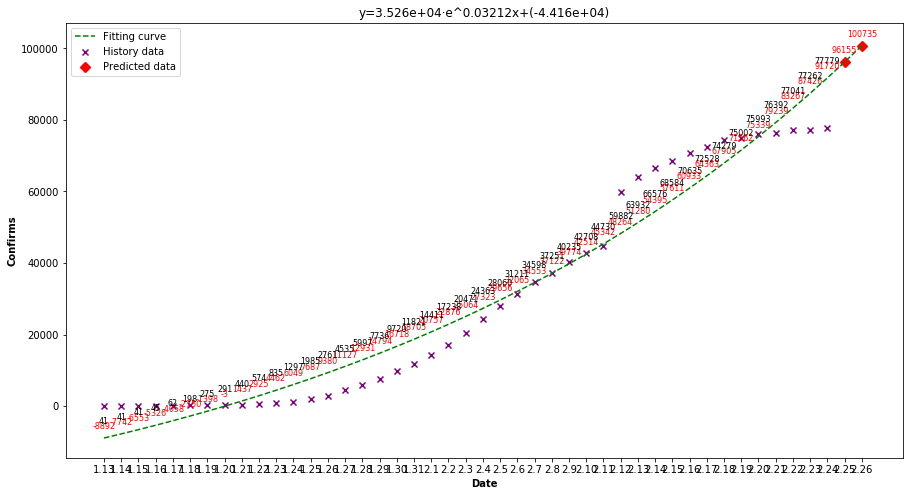

In [5]:
df = sequence_analyse(data)
date, confirm = df['date'].values, df['confirm'].values
x = list(np.arange(len(date)))

def func(x, a, b, c):
    return a * np.exp(b * x) + c

plt.figure(figsize=(15,8))
plt.scatter(x, confirm, color='purple', marker='x', label="History data")
# plt.plot(x, confirm, color='gray', label="History curve")
popt, pcov = curve_fit(func, x, confirm)

# 预测未来天数
predict_days = 2

predict_x = x + [x[-1] + i for i in range(1, 1 + predict_days)]
predict_confirm = [func(i, popt[0],popt[1],popt[2]) for i in predict_x]
plt.plot(predict_x, predict_confirm, 'g--', label="Fitting curve")
plt.title("y={:.4}·e^{:.4}x+({:.4})".format(popt[0], popt[1], popt[2]), loc="center")
plt.scatter(predict_x[-predict_days:], predict_confirm[-predict_days:], marker='x', color="red", linewidth=7, label="Predicted data")

date_labels = get_date_list(2)
plt.xticks(predict_x, date_labels[:len(predict_x) + 1])
plt.legend()
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Confirms", fontweight="bold")

for i in range(len(predict_x)):
    plt.text(predict_x[i], predict_confirm[i] + 2000, int(predict_confirm[i]), ha='center', va='bottom', fontsize=8, color='red')
for i in range(len(x)):
    plt.text(x[i], predict_confirm[i] + 3500, confirm[i], ha='center', va='bottom', fontsize=8)

# Logistic拟合

[4.59428714e+04 6.59370000e+01 3.03380987e-01]


Text(0, 0.5, 'infected number')

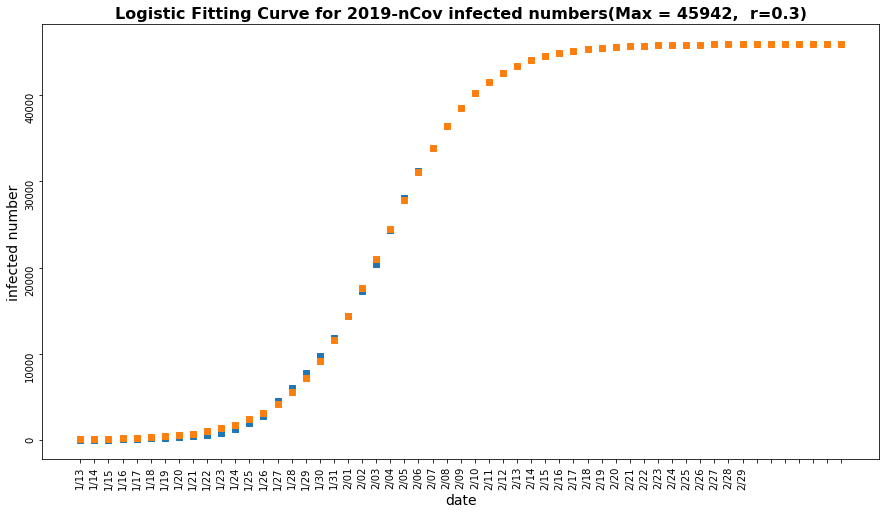

In [7]:
from scipy.optimize import curve_fit
import urllib
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import scipy as sp
from scipy.stats import norm

def date_encode(date):
    # '01.24' -> 1 * 100 + 24 = 124
    d = date.split('/')
    month, day = int(d[0]), int(d[1])
    return 100 * month + day


def date_decode(date):
    # 124 -> '01.24'
    return '{}.{}'.format(str(date // 100), str(date % 100))
    
    
def sequence_analyse(data):
    date_list, confirm_list, dead_list, heal_list, suspect_list = [], [], [], [], []
    data.sort(key = lambda x: date_encode(x['date']))
    for day in data:
        date_list.append(day['date'])
        confirm_list.append(int(day['confirm']))
        dead_list.append(int(day['dead']))
        heal_list.append(int(day['heal']))
        suspect_list.append(int(day['suspect']))
    return pd.DataFrame({
        'date': date_list, 
        'confirm': confirm_list, 
        'dead': dead_list,
        'heal': heal_list,
        'suspect': suspect_list
    })


def get_date_list(target_month = 3):
    """
    得到从1月13日到month月最后一天的所有日期列表
    """
    month_day = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    cur_month, cur_day = 1, 13
    ans = []
    while cur_month <= target_month:
        while cur_day <= month_day[cur_month]:
            d = "0" + str(cur_day) if cur_day < 10 else str(cur_day)
            ans += [str(cur_month) + "/" + d]
            cur_day += 1
        cur_day = 1
        cur_month += 1
    return ans


def logistic_function(t, K, P0, r):
    exp = np.exp(r * (t - t0))
    return (K * exp * P0) / (K + (exp - 1) * P0)


url = 'https://view.inews.qq.com/g2/getOnsInfo?name=wuwei_ww_cn_day_counts'
response = urllib.request.urlopen(url)
json_data = response.read().decode('utf-8').replace('\n','')
data = json.loads(json_data)
data = json.loads(data['data'])

df = sequence_analyse(data)
date, confirm = df['date'].values, df['confirm'].values
x = np.arange(len(confirm))


# 逻辑回归参数
r = 0.6
t0 = 0

# 预测未来天数
predict_days = 30

 
# 用最小二乘法估计拟合
popt, pcov = curve_fit(logistic_function, x, confirm)
print(popt)

#近期情况预测
predict_x = list(x) + [x[-1] + i for i in range(1, 1 + predict_days)]
predict_x = np.array(predict_x)
predict_y = logistic_function(predict_x, popt[0], popt[1], popt[2])

#绘图
plt.figure(figsize=(15, 8))
plt.plot(x, confirm, 's',label="confimed infected number")
plt.plot(predict_x, predict_y, 's',label="predicted infected number")
date_labels = get_date_list(2)
plt.xticks(predict_x, date_labels[:len(predict_x) + 1], rotation=90)
plt.yticks(rotation=90)

plt.title("Logistic Fitting Curve for 2019-nCov infected numbers(Max = {},  r={:.2})".format(int(popt[0]), popt[2]), fontsize=16, fontweight="bold")
plt.xlabel('date', fontsize=14)
plt.ylabel('infected number', fontsize=14)


[4.76830568e+04 7.12676493e+01 2.98059608e-01]


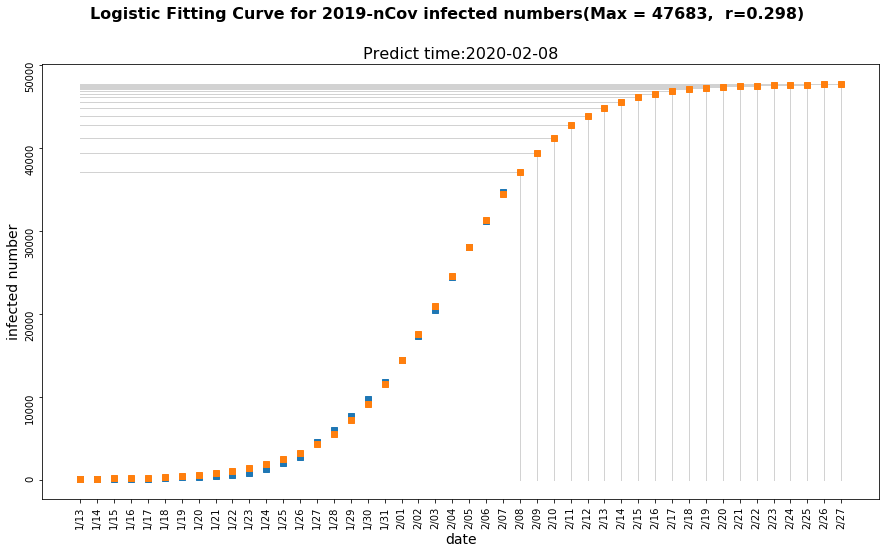

In [5]:
from logistic_predict import predict
predict()

[4.81434798e+04 7.29817139e+01 2.96487936e-01]


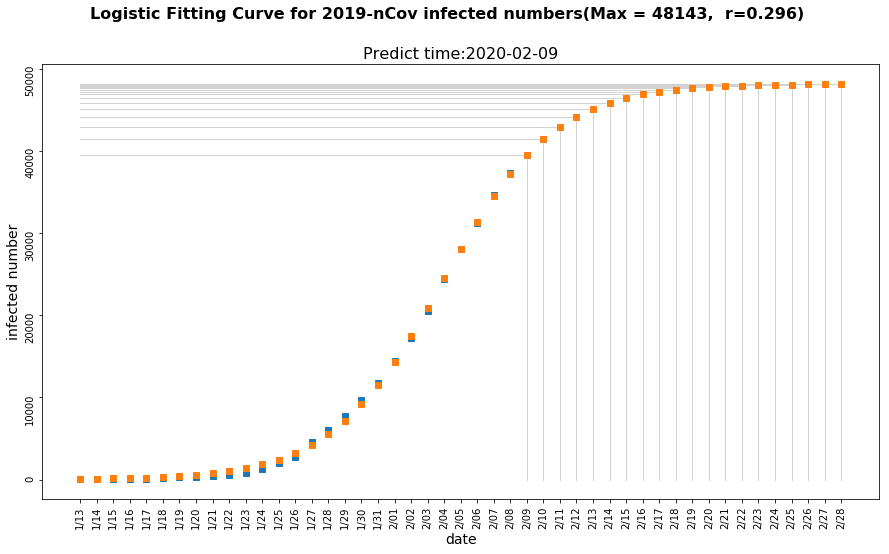

In [6]:
from logistic_predict import predict
predict()

[4.94013653e+04 7.92607154e+01 2.91200402e-01]


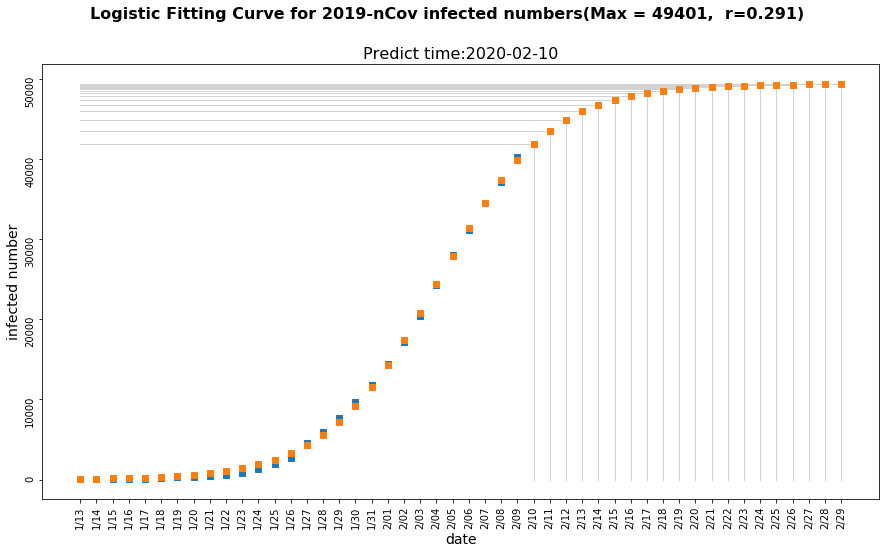

In [8]:
from logistic_predict import predict
predict()

[8.18807132e+04 2.31647575e+02 2.21978308e-01]


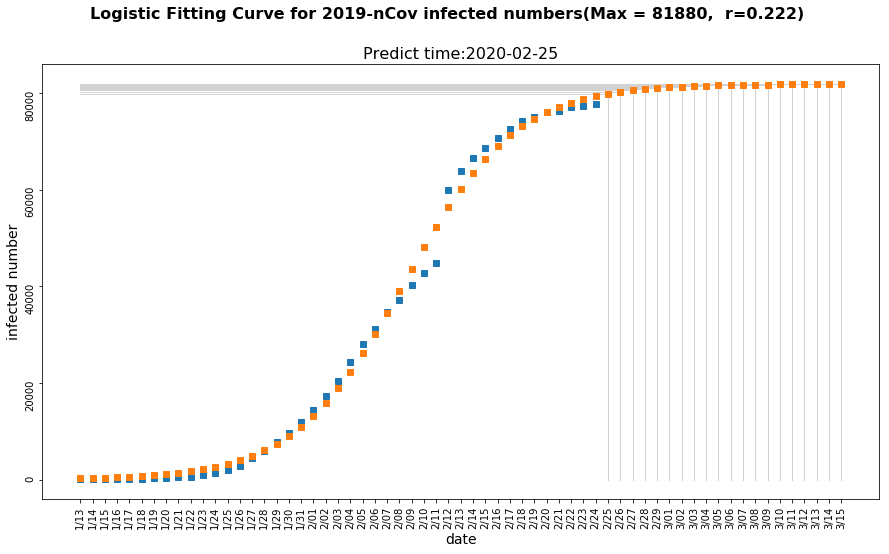

In [2]:
from logistic_predict import predict
predict()